In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer as Tfidf
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
import seaborn as sea
%matplotlib inline

In [2]:
#read datasets in
evilzone = pd.read_csv("./datasets/evilzone_posts.csv")
intel_exchange = pd.read_csv("./datasets/Intel_Exchange_Posts.csv")

In [3]:
#check their size
print "Shape of clearweb set:", evilzone.shape, " Shape of dark web set:", intel_exchange.shape

Shape of clearweb set: (1884, 4)  Shape of dark web set: (2068, 4)


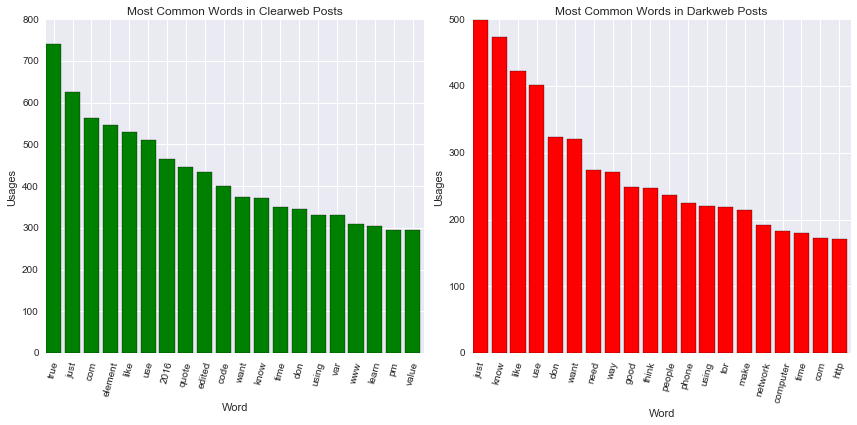

In [7]:
def freq_plt(axis, title, freq, tok_size, color): #generates bar graphs as per schema above
    
    x_lab = np.arange(20)
    words, incidences = zip(*freq[:20])
    incidences = np.array(incidences)
    
    axis.bar(x_lab, incidences, color=color)
    axis.set_xticks(x_lab+.4)
    axis.set_xticklabels(words)
    axis.set_title(title)
    axis.set_xlabel("Word")
    #axis.set_ylim(0,0.25)
    axis.set_ylabel("Usages")

#vectorize clearweb tweets

vectorizer = CountVectorizer(stop_words='english') #ignores stop words such as "a," "the," etc.

c_revs = evilzone['content'].values #clearweb tweets
d_revs = intel_exchange['content'].values #darkweb tweets

c_tokens = vectorizer.fit_transform([unicode(a, errors='replace') for a in c_revs]) #tokenize and get words by frequency
c_freq = sorted(zip(vectorizer.get_feature_names(), np.array(c_tokens.sum(axis=0)).ravel()), key=lambda x: -x[1])

d_tokens = vectorizer.fit_transform([unicode(str(a), errors='replace') for a in d_revs]) #tokenize and get words by frequency
d_freq = sorted(zip(vectorizer.get_feature_names(), np.array(d_tokens.sum(axis=0)).ravel()), key=lambda x: -x[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

freq_plt(ax[0], "Most Common Words in Clearweb Posts", c_freq, c_tokens.shape[0], "green")
freq_plt(ax[1], "Most Common Words in Darkweb Posts", d_freq, d_tokens.shape[0], "red")


for ax in fig.axes: #plot most common words
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=75)
    
plt.tight_layout()
fig.savefig('Hacker_Words.png', dpi=900, bbox_inches='tight')

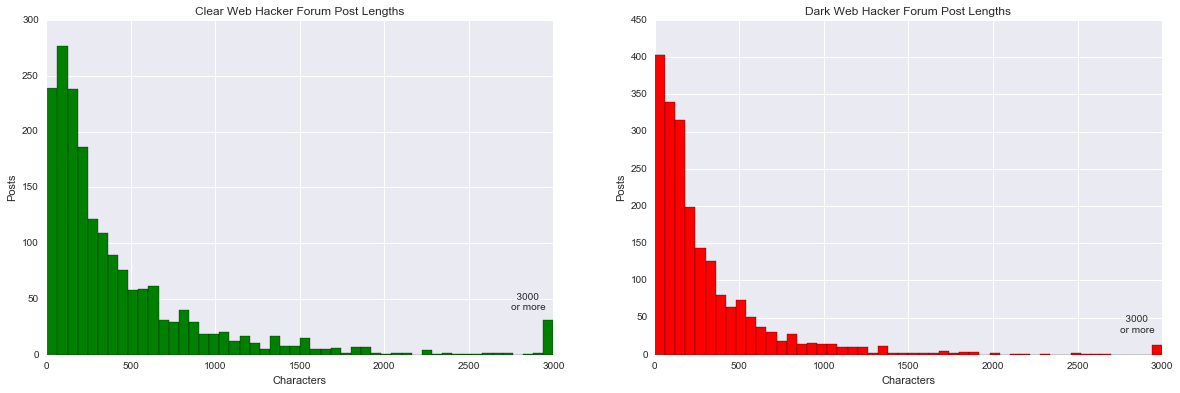

In [8]:
c_lens = [] #clearweb tweet lengths
d_lens = [] #darkweb tweet lengths

for post in evilzone['content'].values:
    length = len(str(post).strip())
    if length <= 3000:
        c_lens.append(length)
    else:
        c_lens.append(3000)
        
for post in intel_exchange['content'].values:
    length = len(str(post).strip())
    if length <= 3000:
        d_lens.append(length)
    else:
        d_lens.append(3000)
        
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].hist(c_lens, bins=50, color='green')
ax[0].set_xlim(0, 3000)
ax[0].set_title('Clear Web Hacker Forum Post Lengths')
ax[0].set_xlabel("Characters")
ax[0].set_ylabel("Posts")
ax[0].annotate("  3000\nor more", (2750,40))


ax[1].hist(d_lens, bins=50, color='red')
ax[1].set_xlim(0, 3000)
ax[1].set_title('Dark Web Hacker Forum Post Lengths')
ax[1].set_xlabel("Characters")
ax[1].set_ylabel("Posts")
ax[1].annotate("  3000\nor more", (2750,30))

fig.savefig('Hacker_lengths.png', dpi=900, bbox_inches='tight')
plt.show()

In [6]:
dark_words = dict(d_freq)
clear_words = dict(c_freq)

expletives = pd.read_csv("./datasets/profanity.csv", header=None)[0].tolist()

#deepweb expletives
dwe = 0
for x in expletives:
    try:
        dwe += dark_words[x]
    except KeyError:
        continue

#clearweb expletives
cwe = 0
for x in expletives:
    try:
        cwe += clear_words[x]
    except KeyError:
        continue
        
print "About {}% of words in dark web hacker forum posts are profanity".format((dwe / float(d_tokens.size))*100)
print "About {}% of words in clear web hacker forum posts are profanity".format((cwe / float(c_tokens.size))*100)

#deepweb expletives
dwty = dark_words['thank'] + dark_words['thanks']
#clearweb expletives
cwty = clear_words['thank'] + clear_words['thanks']

print "\nThanks account for {}% of dark web hacker forum words".format((dwty / float(d_tokens.size))*100)
print "Thanks account for {}% of clear web hacker forum words".format((cwty / float(c_tokens.size))*100)

print "\nThe word 'privacy' occurs once per {} dark web hacker forum posts".format((dark_words['privacy'] / float(d_tokens.size))*100)
print "The word 'privacy' occurs once per {} clear web hacker forum posts".format((clear_words['privacy'] / float(c_tokens.size))*100)

About 0.285478652541% of words in dark web hacker forum posts are profanity
About 0.262724172256% of words in clear web hacker forum posts are profanity

Thanks account for 0.528664171372% of dark web hacker forum words
Thanks account for 0.476493529805% of clear web hacker forum words

The word 'privacy' occurs once per 0.0486371037662 dark web hacker forum posts
The word 'privacy' occurs once per 0.0962778022552 clear web hacker forum posts
